This notebook looks at the influence function of the logarithm of the score matching density function
in a kernel exponential family $\mathcal{Q}$ evaluated at a point $w$, which is defined as 

$$
\mathrm{IF} \big( y; \log q (w; F) \big) := \lim_{\varepsilon \to 0^+} \frac{1}{\varepsilon} \Big(\log q \big(w; (1 - \varepsilon) F + \varepsilon \delta_y \big) - \log q \big(w; F\big)\Big), \quad \text{ for all } w \in \mathcal{X}, \hspace{50pt} (*)
$$

where $\mathcal{X} \subseteq \mathbb{R}$ is the sample space, $F$ is a probability distribution over $\mathcal{X}$, $q (\cdot; F): \mathcal{X} \to [0, \infty)$ is the score matching density function in $\mathcal{Q}$ under the probability distribution $F$, $\varepsilon \in (0, 1]$, and $\delta_y$ is the point mass 1 at $y \in \mathcal{X}$. 

We approximate $(*)$ by 

$$
\widehat{\mathrm{IF}} \big( y; \log q (w; F_n) \big) := \frac{1}{\varepsilon} \Big(\log q \big(w; (1 - \varepsilon) F_n + \varepsilon \delta_y\big) - \log q \big(w; F_n\big)\Big), \quad \text{ for all } w \in \mathcal{X}, \hspace{50pt} (**)
$$

with a small $\varepsilon$, where $F_n$ is the empirial distribution. 

In the below, we use the `waiting` variable in the Old Faithful Geyser dataset and insert an additional observation, i.e., $y$ in $(**)$, each time. These additional observations are $90$, $92$, $\cdots$, $398$, $400$. In additional, we choose the sample space $\mathcal{X} = (0, \infty)$, the kernel function to be the Gaussian kernel function, the bandwidth parameter to be $5.0$, $7.0$ and $9.0$, the penalty parameter to be $\exp({-12.0})$, $\exp({-10.0})$ and $\exp({-8.0})$, and $\varepsilon$ in $(*)$ to be `1e-8`. 

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')

kernel_type = 'gaussian_poly2'
bw_list = [5.0, 7.0, 9.0]
log_pen_param_list = [-12.0, -10.0, -8.0]
contam_weight = 1e-8

## Influence Function at Isolated Observations

The following plots show $\widehat{\mathrm{IF}} (y; \log q (y; F_n))$ as $y$ becomes larger under various scenarios. 

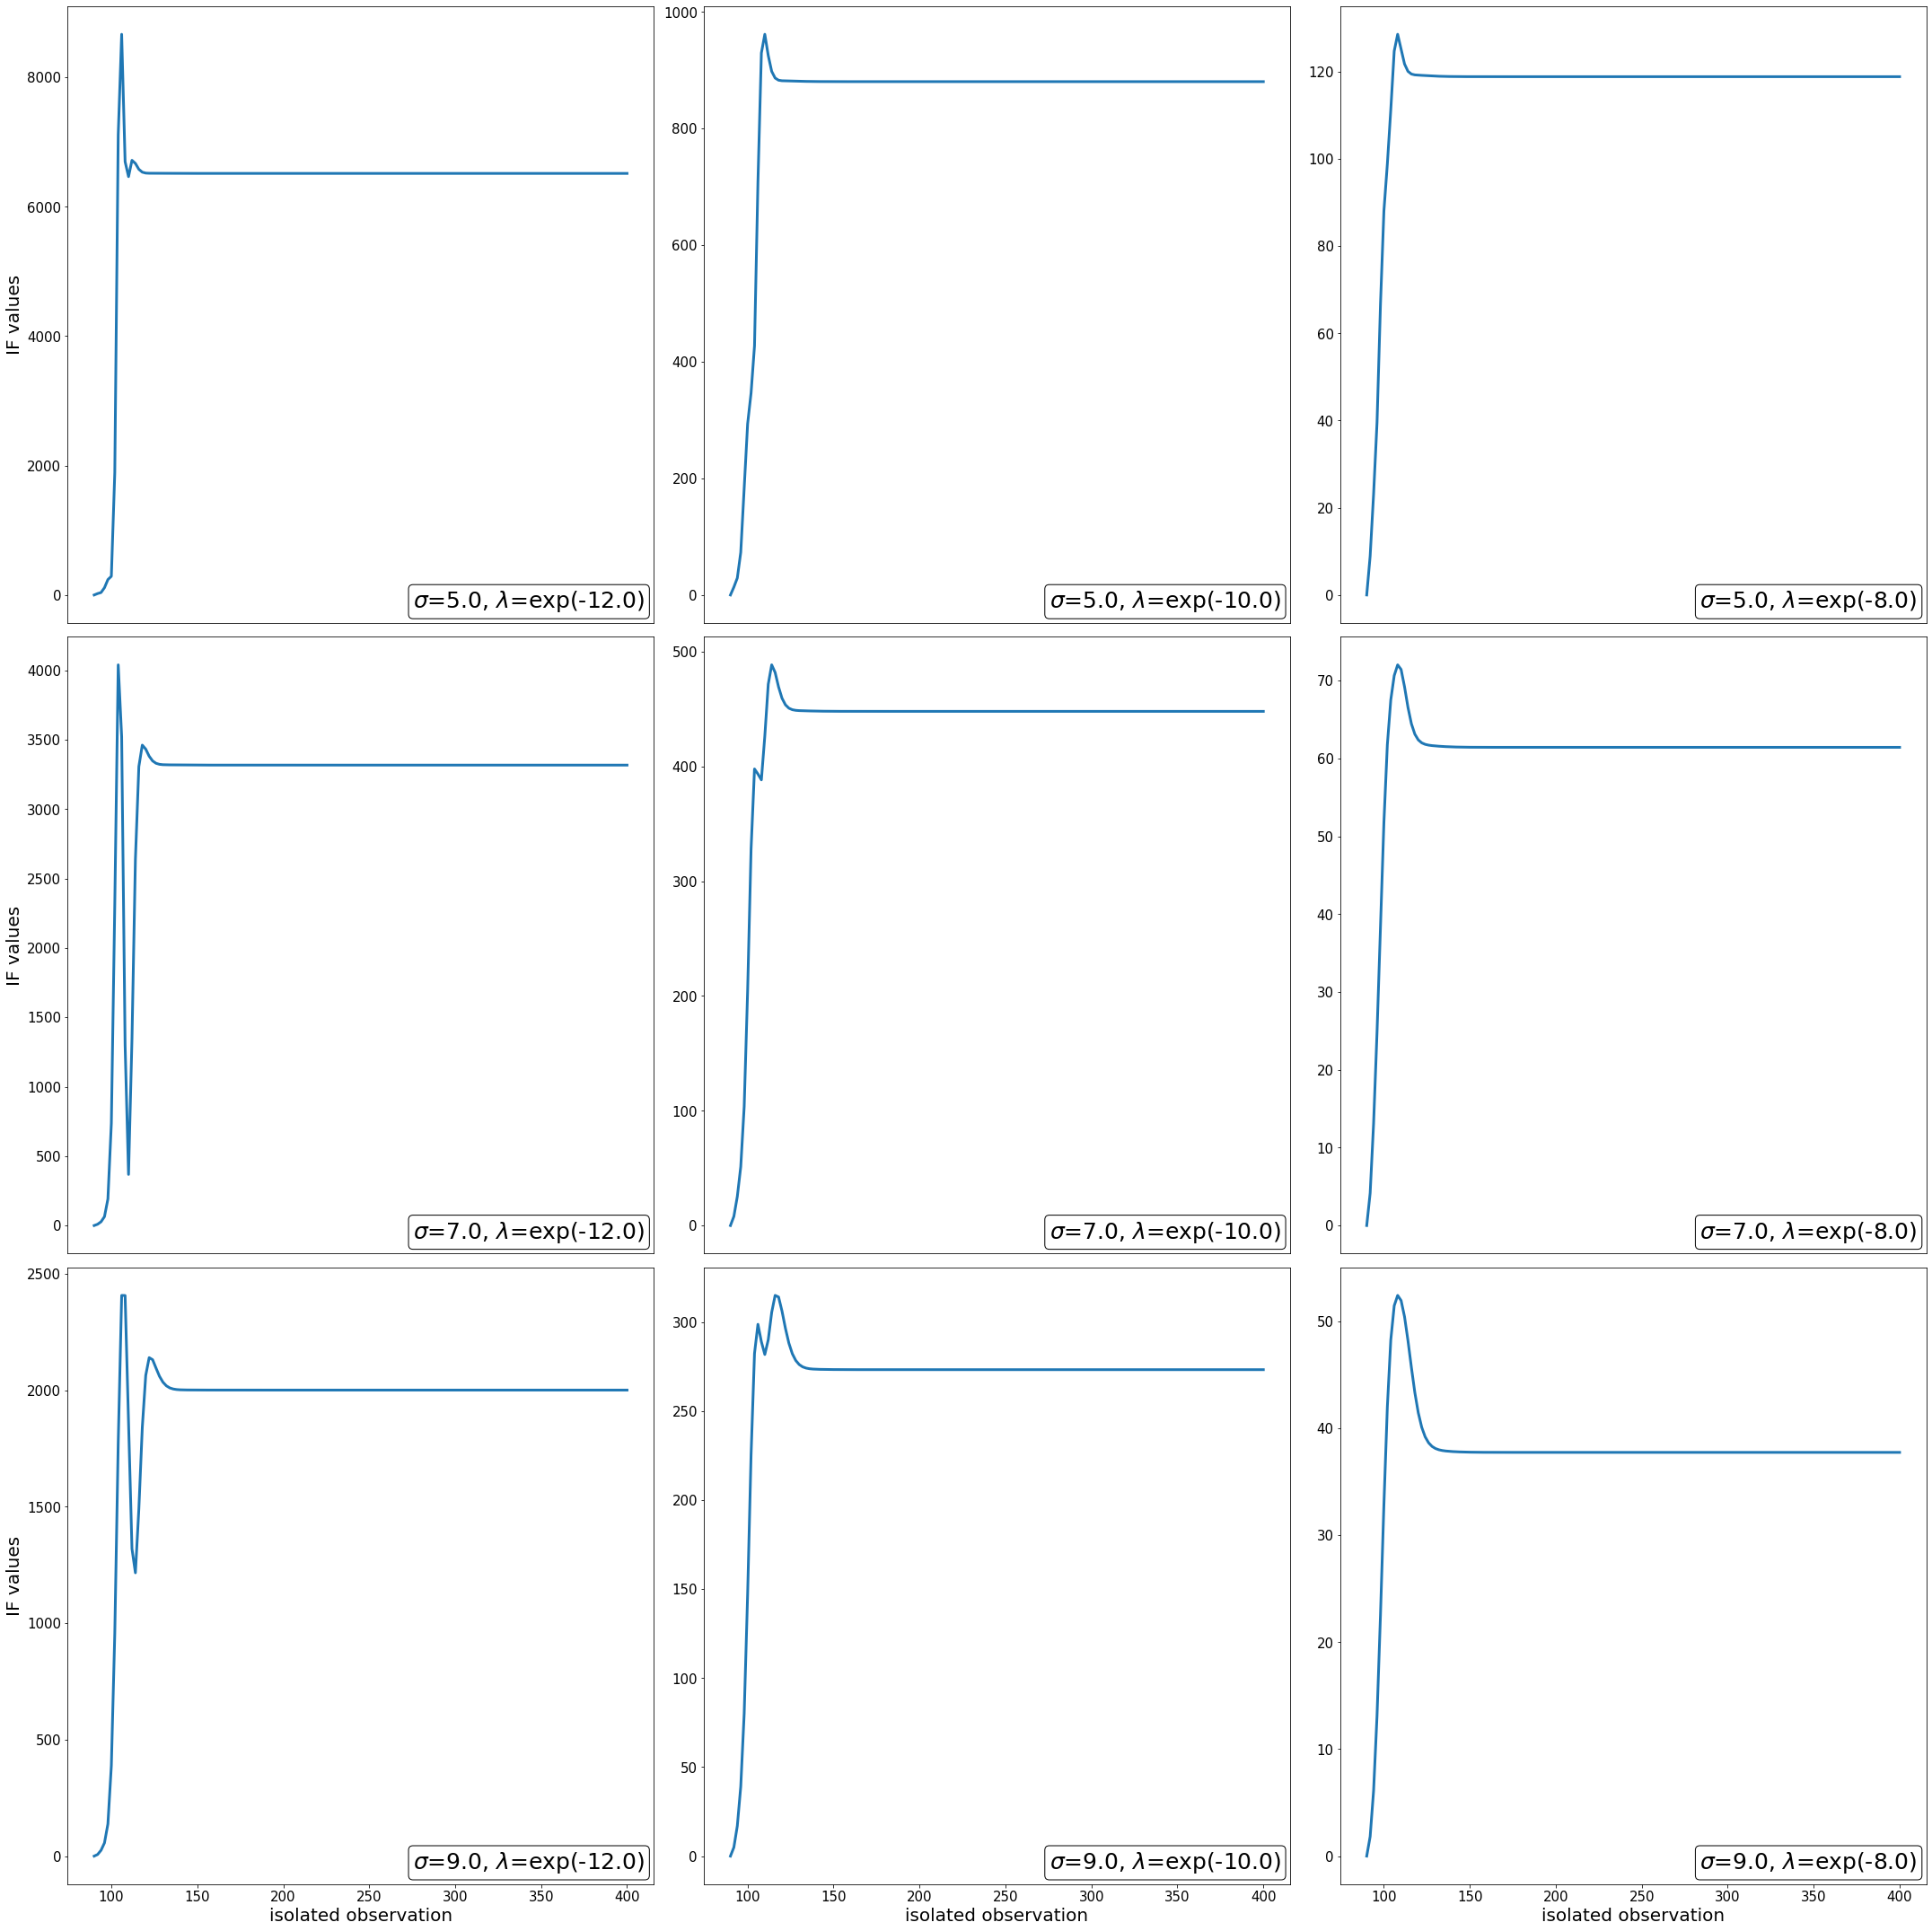

In [3]:
save_dir=f'data/bw={bw_list[0]}-kernel={kernel_type}-loglambda={log_pen_param_list[0]}-contamweight={contam_weight}'
contam_data_array = np.load(save_dir + f'/contam_data.npy').reshape(-1, 1)

fig = plt.figure(constrained_layout=False)
fig.set_figheight(30)
fig.set_figwidth(30)
ncols = 3
nrows = 3

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 15
linewidth = 3.0
x_label = 'isolated observation'
y_label = 'IF values'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw, log_pen_param = bw_list[i], log_pen_param_list[j]
        
        # read in data 
        save_dir=f'data/bw={bw}-kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}'

        IF_contam = []
        for l in range(len(contam_data_array)): 
            result = np.load(save_dir + f'/contam_data={contam_data_array[l]}-IF-logden-contamdata.npy')
            IF_contam.append(result)
        IF_vals = np.diag(np.array(IF_contam))
        
        ax.plot(contam_data_array.flatten(), IF_vals, color = 'tab:blue', linewidth = linewidth)
    
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}, $\lambda$=exp({pen})".format(bw = bw, pen = log_pen_param)
        ax.text(0.985, 0.055,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig('plots/geyser-waiting-inf-fun-isolated-obs.pdf')

**Observations:**

- When the isolated observation is moved sufficiently away from others, $\widehat{\mathrm{IF}} ( y; \log q (y; F_n))$ achieves a limit. 

- The value of this limit is inversely proportional to both bandwidth parameter $\sigma$ in the Gaussian kernel function and the penalty parameter $\lambda$. 

**Idea:** Show $\mathrm{IF} (y; \log q (y; F))$ defined in $(*)$ achieves a limit as $y \to \infty$, and quantify this limit. 